# Setting up the dataset
> We read the dataset and set a start and end index for reading only a particular duration of the data if required.

In [14]:
# Importing the required modules
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# We can now change the start and end date of our data set
# as per our requirment

START_DATE = "2018-01-01" # @param {type: "date"}
END_DATE = "2022-01-12" # @param {type: "date"}

In [16]:
df = pd.read_csv('/content/daily_data.csv')
start_index = df[df.datetime == START_DATE].index[0]
end_index = df[df.datetime == END_DATE].index[0]
df = df.loc[start_index:end_index+1]
df

,datetime,high,low,close,open,volume
0,2018-01-01,13818.55,12750.00,13135.00,13715.65,6970.441076
1,2018-01-02,14750.00,12890.02,14580.00,13135.00,16359.347340
2,2018-01-03,15473.49,14150.00,14749.97,14576.87,19457.238601
3,2018-01-04,15280.00,13918.04,14811.00,14710.00,18783.876561
4,2018-01-05,17118.13,14600.00,16579.00,14805.01,22383.657333
...,...,...,...,...,...,...
1468,2022-01-08,42246.37,40501.00,40679.82,41707.04,27031.900870
1469,2022-01-09,42300.00,40520.00,41966.99,40679.82,27291.009660
1470,2022-01-10,42786.70,39650.00,41604.58,41966.99,51064.904360
1471,2022-01-11,43100.00,41158.99,42755.00,41604.58,38062.818280


In [17]:
# Defining Key Variables
LSB_ratio = 2 # @param {type: "number"}
USB_ratio = 0.25 # @param {type: "number"}

# Plotting the data

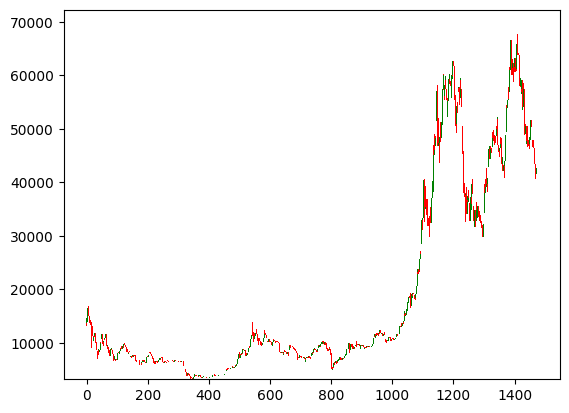

In [18]:
# Plotting the candlestick pattern for the entire data
up, down = [], []
for i in df.index:
  if df.close[i] >= df.open[i]:
    up.append(df.loc[i])
  elif df.close[i] < df.open[i]:
    down.append(df.loc[i])

up = pd.DataFrame(up)   # Up indicates Green Candles
down = pd.DataFrame(down) # Down indicates Red Candles
plt.bar(up.index, up.close - up.open, bottom = up.open, width = 3, color = "Green")
plt.bar(up.index, up.high - up.close, bottom = up.close, width = 0.3, color = "Green")
plt.bar(up.index, up.open - up.low, bottom = up.low, width = 0.3, color = "Green")

plt.bar(down.index, down.open - down.close, bottom = down.close, width = 3, color = "Red")
plt.bar(down.index, down.high - down.open, bottom = down.open, width = 0.3, color = "Red")
plt.bar(down.index, down.close - down.low, bottom = down.low, width = 0.3, color = "Red")
plt.show()

# Identifying Uptrends and Downtrends

For this we take a period of 3 days. If the closing price continues to rise for 3 days straight then it is an uptrend, and similarly, if the closing price continues to fall for 3 days straight it is a downtrend.


In [19]:
# Identifying downtrends and uptrends
trend = ["No Trend", "No Trend"]
for i in range(2, len(df.index)):
  if(df.close[i - 2] < df.close[i - 1] < df.close[i]):  # UpTrend
    trend.append("Uptrend")
  elif(df.close[i - 2] > df.close[i - 1] > df.close[i]):  # UpTrend
    trend.append("Down trend")
  else:
    trend.append("No Trend")

df['Trend'] = trend
df

,datetime,high,low,close,open,volume,Trend
0,2018-01-01,13818.55,12750.00,13135.00,13715.65,6970.441076,No Trend
1,2018-01-02,14750.00,12890.02,14580.00,13135.00,16359.347340,No Trend
2,2018-01-03,15473.49,14150.00,14749.97,14576.87,19457.238601,Uptrend
3,2018-01-04,15280.00,13918.04,14811.00,14710.00,18783.876561,Uptrend
4,2018-01-05,17118.13,14600.00,16579.00,14805.01,22383.657333,Uptrend
...,...,...,...,...,...,...,...
1468,2022-01-08,42246.37,40501.00,40679.82,41707.04,27031.900870,Down trend
1469,2022-01-09,42300.00,40520.00,41966.99,40679.82,27291.009660,No Trend
1470,2022-01-10,42786.70,39650.00,41604.58,41966.99,51064.904360,No Trend
1471,2022-01-11,43100.00,41158.99,42755.00,41604.58,38062.818280,No Trend


# Calculating the Shadow to Body Length Ratios

In [20]:
df['Body_Length'] = abs(df.close - df.open)
upper_shadow, lower_shadow = [], []
for i in df.index:
  if df.close[i] >= df.open[i]: # For green candles
    upper_shadow.append(df.high[i] - df.close[i])
    lower_shadow.append(df.open[i] - df.low[i])
  else: # For red candles
    upper_shadow.append(df.high[i] - df.open[i])
    lower_shadow.append(df.close[i] - df.low[i])

df['Upper_Shadow'] = upper_shadow
df['Lower_Shadow'] = lower_shadow
df['USB_Ratio'] = df.Upper_Shadow / df.Body_Length
df['LSB_Ratio'] = df.Lower_Shadow / df.Body_Length
df

,datetime,high,low,close,open,volume,Trend,Body_Length,Upper_Shadow,Lower_Shadow,USB_Ratio,LSB_Ratio
0,2018-01-01,13818.55,12750.00,13135.00,13715.65,6970.441076,No Trend,580.65,102.90,385.00,0.177215,0.663050
1,2018-01-02,14750.00,12890.02,14580.00,13135.00,16359.347340,No Trend,1445.00,170.00,244.98,0.117647,0.169536
2,2018-01-03,15473.49,14150.00,14749.97,14576.87,19457.238601,Uptrend,173.10,723.52,426.87,4.179780,2.466031
3,2018-01-04,15280.00,13918.04,14811.00,14710.00,18783.876561,Uptrend,101.00,469.00,791.96,4.643564,7.841188
4,2018-01-05,17118.13,14600.00,16579.00,14805.01,22383.657333,Uptrend,1773.99,539.13,205.01,0.303908,0.115564
...,...,...,...,...,...,...,...,...,...,...,...,...
1468,2022-01-08,42246.37,40501.00,40679.82,41707.04,27031.900870,Down trend,1027.22,539.33,178.82,0.525038,0.174082
1469,2022-01-09,42300.00,40520.00,41966.99,40679.82,27291.009660,No Trend,1287.17,333.01,159.82,0.258715,0.124164
1470,2022-01-10,42786.70,39650.00,41604.58,41966.99,51064.904360,No Trend,362.41,819.71,1954.58,2.261831,5.393284
1471,2022-01-11,43100.00,41158.99,42755.00,41604.58,38062.818280,No Trend,1150.42,345.00,445.59,0.299890,0.387328


# Identifying Hammer Patterns

In [21]:
# Identifying Hammer Patterns
# 1. Market is in a down trend
# 2. The Lower Shadow to Body Length Ratio is > 2
# 3. The Upper Shadow is small ( < US Ratio here)

hammer = []
for i in df.index:
  if(df.Trend[i] == "Down trend"):
    if(df.LSB_Ratio[i] > LSB_ratio and df.USB_Ratio[i] < USB_ratio):
      # Hammer Pattern identified
      hammer.append(df.loc[i])

print("Total hammer patterns identified: ", len(hammer))
hammer = pd.DataFrame(hammer)

hammer

Total hammer patterns identified:  4


,datetime,high,low,close,open,volume,Trend,Body_Length,Upper_Shadow,Lower_Shadow,USB_Ratio,LSB_Ratio
9,2018-01-10,14863.93,13131.31,14548.32,14803.46,18317.225351,Down trend,255.14,60.47,1417.01,0.237007,5.553853
173,2018-06-23,6232.72,5918.94,6120.00,6212.96,34942.516039,Down trend,92.96,19.76,201.06,0.212565,2.162866
626,2019-09-19,10210.00,9653.00,10029.25,10177.91,37483.979042,Down trend,148.66,32.09,376.25,0.215862,2.530943
1177,2021-03-23,56561.60,53000.00,55364.69,56492.91,71223.951549,Down trend,1128.22,68.69,2364.69,0.060884,2.095948


# Plottiing the Hammer patterns

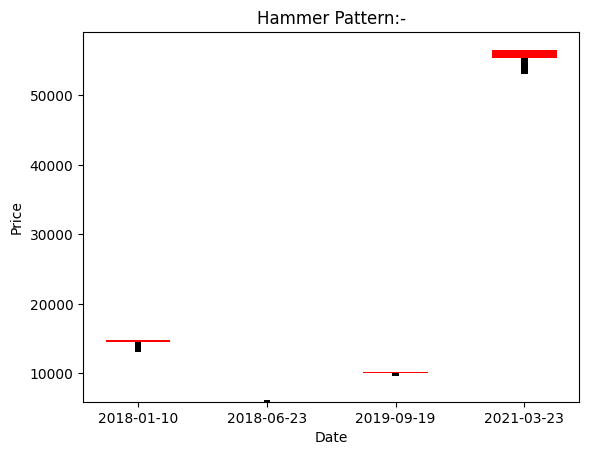

In [22]:
# Plotting the candlestick pattern
up, down = [], [] # For the green and red candles respecitively
for i in hammer.index:
  if hammer.close[i] >= hammer.open[i]:
    up.append(hammer.loc[i])
  elif hammer.close[i] < hammer.open[i]:
    down.append(hammer.loc[i])

up = pd.DataFrame(up)
down = pd.DataFrame(down)

plt.xlabel("Date")
plt.ylabel("Price")
if(len(up) != 0):
  plt.bar(up.datetime, up.close - up.open, bottom = up.open, width = 0.5, color = "Green")  # Body of the candlestick
  plt.bar(up.datetime, up.high - up.close, bottom = up.close, width = 0.05, color = "Black")  # Upper Wick
  plt.bar(up.datetime, up.open - up.low, bottom = up.low, width = 0.05, color = "Black")  # Lower Wick

if(len(down) != 0):
  plt.bar(down.datetime, down.open - down.close, bottom = down.close, width = 0.5, color = "Red") # Body of the candlestick
  plt.bar(down.datetime, down.high - down.open, bottom = down.open, width = 0.05, color = "Black")  # Upper Wick
  plt.bar(down.datetime, down.close - down.low, bottom = down.low, width = 0.05, color = "Black") # Lower Wick

plt.title("Hammer Pattern:-")
plt.show()